This exercise is based on a walkthrough in Packt's advanced machine learning course available at udemy.com

In [20]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import matplotlib.pyplot as plt

## Wisconsin Breast Cancer Data Set

In [2]:
# Load and observe description of data
cancer_data = load_breast_cancer()
print(cancer_data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

## EDA

In [3]:
# Observe which attributes are available in the data
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(cancer_data.feature_names)
print(cancer_data.data)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


## Converting to a dataframe

In [5]:
df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)

In [6]:
# Print first rows of data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Print summary of each varaible
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# Add 'target' column to dataframe
df['target'] = cancer_data.target

In [9]:
# Print summary of new target column. 1 = Benign, 0 = Malignant
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

## Partition Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data,
    cancer_data.target,
    stratify = cancer_data.target,
    shuffle = True,
    random_state = 314
)


In [11]:
# Observe dimensions of each new array
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [12]:
# How many malignant in training set?
print(y_train[y_train == 0].size)

# How many malignant in testing set?
print(y_test[y_test == 0].size)

159
53


## KNN

### Training our model

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

### Making Predictions

In [15]:
print("Test set predictions: {}".format(knn.predict(X_test)))

Test set predictions: [0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0
 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1]


### Testing Accuracy

In [16]:
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.94


### Improving the Model Performance

Min Max Scaling scales the numeric values of a dataset by transforming them into a range between 0 and 1. The formula used is as follows:

X_std = (X - X.min) / (X.max - X.min)


X_scaled = X_std * (max - min) + min


In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_minmax_scaled = scaler.transform(X_train)
X_test_minmax_scaled = scaler.transform(X_test)

In [18]:
knn.fit(X_train_minmax_scaled, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_minmax_scaled, y_test)))
print("Train set accuracy: {:.2f}".format(knn.score(X_train_minmax_scaled, y_train)))


Test set accuracy: 0.98
Train set accuracy: 0.97


### Testing with different values of k

In [19]:
train_accuracy = []
test_accuracy = []

neighbors = range(1, 11)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train_minmax_scaled, y_train)
    train_accuracy.append(knn.score(X_train_minmax_scaled, y_train))
    test_accuracy.append(knn.score(X_test_minmax_scaled, y_test))


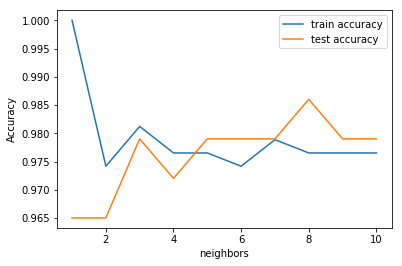

In [21]:
plt.plot(neighbors, train_accuracy, label = "train accuracy")
plt.plot(neighbors, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("neighbors")
plt.legend()

In [24]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train_minmax_scaled, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_minmax_scaled, y_test)))

Test set accuracy: 0.99
